# Leak Detection with Machine Learning

In this notebook I show you how can be used Machine Learning algorithms for leak detection in water netwoks, this project can be dividided into the following parts.

<ul>
    <li> Problem Analysis.</li>
    <li> Tools to use.</li>
    <li> Methodology to be used </li>
    <li> First approach</li>
    <li> Second approach</li>
    <li> Performance evaluation</li>
    <li> Deploy</li>
</ul>

<h2>Problem analysis</h2>

The most common problem in water network systems are the losses generated by leak in pipes and junctions, this losses can be represent a huge percentege of the water produced in the generation plants, so this problem results in a deterioration of the environment and considerable costs, therefore, it is important to use the new technologies to resolve these type of problems.
<br>
<br>
In this project will be used differents Machine Learning Algoritms to solve the problem of lake detection in water networks systems.

<h2>Tools to use</h2>

This project will be developed with wntr library from Python, wntr is a library to simulate water networks with Python, also, with this library it's possible to simulate the behavior of a water network system in presence of leaks of various sizes. Before to start with code development I will define what is a leak

<h3>What is a Leak?</h3>

A leak is a loss of water in anywhere point of a water network system, the amount of water loss is proportional to the pressure in the system, meaning that high pressures in water networks generates greather losses of water, while with low pressures the water loss is lower.
<br>
<br>
To develop the project is necessary a water network to leak simulation, in this project the water network to be used is a network that brings the documentation, named Net3.
<img src="data/net3.png">
The image above show the water network that will be used for this project. 

<h2>Methodology to be used </h2>

The methodology consists of using supervised learning to detect leaks in the hydraulic network,To do this it is necessary to generate a large amount of tagged data, in such a way that a neural network can be trained to detect leaks in the water network.

<h2> First approach</h2>
As a first approach, the goal of the algorithm will be to determine wheter exists leak or not in the water network.
to do this, a database will be created, in this database there will be examples of the water network with leak and examples without leaks. In this case will be used the pressure in all nodes of the network.

<h3> Data generation </h3>

<h4> Leak simulation </h4>

Below is a small example of how to simulate a leak in the hydraulic network.

In [23]:
# imports
import wntr 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
wn = wntr.network.WaterNetworkModel("data/Net3.inp")

(<matplotlib.collections.PathCollection at 0x7f9ac83fe890>,
 <matplotlib.collections.LineCollection at 0x7f9ac82206d0>)

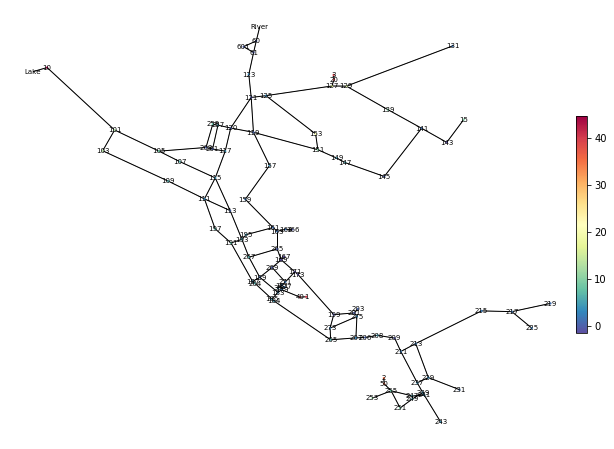

In [14]:
plt.figure(figsize = (12,8))
wntr.graphics.plot_network(wn, node_attribute='elevation',ax=plt.gca(),node_labels = True,node_size = 5)

In [15]:
# simulation
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

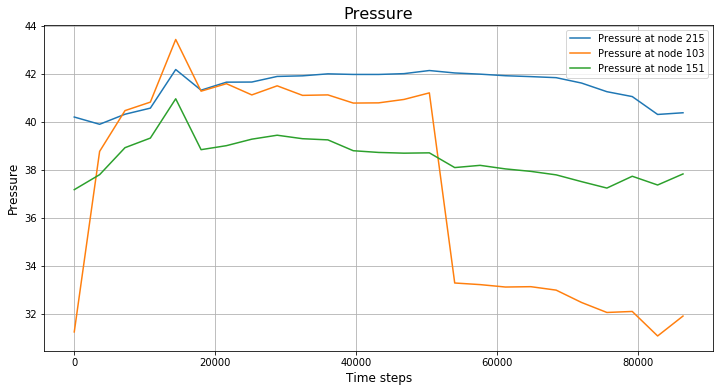

In [39]:
#Pressure
plt.figure(figsize=(12,6))
plt.plot(results.node['pressure']['215'], label = 'Pressure at node 215')
plt.plot(results.node['pressure']['103'], label = 'Pressure at node 103')
plt.plot(results.node['pressure']['151'], label = 'Pressure at node 151')
plt.legend(loc='best')
plt.xlabel("Time steps",fontsize=12)
plt.ylabel("Pressure",fontsize=12)
plt.title("Pressure",fontsize = 16)
plt.grid()